In [18]:
import numpy as np

# Option parameters
rf  = 0.025 # Risk-free rate
vol = 0.39    # Annual volatility of stock (implied)
S0  = 60 # Stock price at time 0
K   = 63    # Strike price 
T   = 36/365   # Time to expiration of option (in years)


# Simulation parameters

n = 1000     # Number of subperiods (one trading day)
N = 10000 # Number of simulations

# Intermediate calculations
dt  = T/n  # Length of time step
rfT = rf*T # Risk-free rate over the life of option

# The following pro

u  = np.exp(vol*np.sqrt(dt)) # Up growth rate
d  = 1/u                     # Down growth rate

Pu = (np.exp(rf*dt)-d)/(u-d) # Probability of going up
Pd = 1-Pu                    # Probability of going down

In [35]:
# Path to simulate the option's value over time
def SimulatePath(d,u,Pd,S0,K,rf,T):
    S = np.zeros(T+1)
    for i in range(T+1):
        if i == 0:
            S[i] = S0
        else:
            if np.random.rand() < Pd:
                S[i] = S[i-1]*d
            else:
                S[i] = S[i-1]*u
    CT = max(S[T]-K,0) # European Call Option
    return [CT, S]

In [38]:
[CT, S] = SimulatePath(d,u,Pd,S0,K,rf,10)
print(S)

[60.         60.23284236 60.46658832 60.23284236 60.46658832 60.70124138
 60.93680505 61.17328288 60.93680505 61.17328288 61.41067841]


In [39]:
# Monte Carlo simulation to reapeat SimulatePath() 10000 times
def MonteCarlo(d,u,Pd,S0,K,rf,n,N):
    CT = np.zeros(N)
    S = np.zeros((n + 1, N))
    for i in range(N):
        [CT[i],S[:,i]] = SimulatePath(d,u,Pd,S0,K,rf,n)
    ECT = np.average(CT)
    C0 = ECT/np.exp(n*rf)
    # return C0
    return (C0, CT, S)

In [40]:
[C0, CT, S] = MonteCarlo(d,u,Pd,S0,K,rf,n,N)
print(S)

[[60.         60.         60.         ... 60.         60.
  60.        ]
 [60.23284236 60.23284236 60.23284236 ... 60.23284236 59.76805774
  59.76805774]
 [60.         60.         60.46658832 ... 60.46658832 60.
  59.53701209]
 ...
 [61.88823684 57.27511382 60.46658832 ... 47.55813363 57.72051214
  45.75133049]
 [62.12840689 57.4973817  60.70124138 ... 47.74269277 57.4973817
  45.92887796]
 [62.36950898 57.27511382 60.46658832 ... 47.92796813 57.72051214
  45.75133049]]


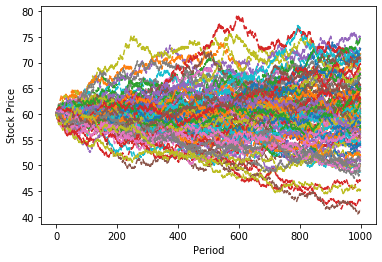

In [41]:
import matplotlib.pyplot as plt
# The matplotlib package contains plotting functions.
plt.plot(S[:,1:100],'--') # Plot the first 100 simulations.
plt.ylabel('Stock Price')
plt.xlabel('Period')
plt.show()

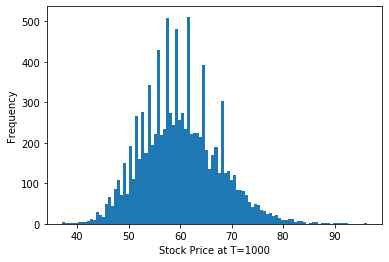

In [24]:
plt.hist(S[1000,:],100)
# Plot histogram of final stock price for all simulations. Use 100 bins.
plt.ylabel('Frequency')
plt.xlabel('Stock Price at T=1000')
plt.show()